# Modelado supervisado
# Modelos de regresión




Lo primero, como siempre, importaremos las librerías que vamos a usar:
- **Manipulación de datos**: `pandas` y `numpy`.
- **Gráficos**: `matplotlib` y `seaborn`.
- **Preprocesado y modelado**: `scipy`, `sklearn`.

In [4]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%run /content/drive/MyDrive/DataAn/Proyects/Life_Expectancy/Functions.ipynb

# Sobre este DataSet

El repositorio de datos de la Organización Mundial de la Salud (OMS) llamado Global Health Observatory (GHO) realiza un seguimiento del estado de salud, así como de muchos otros factores relacionados, para todos los países. Los conjuntos de datos están disponibles para el público con el propósito de análisis de datos de salud. El conjunto de datos relacionado con la esperanza de vida y los factores de salud para 193 países se ha recopilado del mismo sitio web del repositorio de datos de la OMS y los datos económicos correspondientes se obtuvieron del sitio web de las Naciones Unidas. Entre todas las categorías de factores relacionados con la salud, solo se eligieron aquellos factores críticos que son más representativos. El conjunto de datos final consta de 22 columnas y 2938 filas, lo que significa 20 variables predictivas. Todas las variables predictivas se dividieron en varias categorías amplias: factores relacionados con la inmunización, factores de mortalidad, factores económicos y factores sociales.

# Lectura y pre-procesamiento


In [7]:
df= pd.read_csv('/content/drive/MyDrive/DataAn/Proyects/Life_Expectancy/Life_Expectancy_Data.csv')


In [ ]:
realizar_eda(df)

#Correlación que tienen con la variables objetivo (`Life expectancy`).



In [ ]:
df.corr()['Life expectancy '].sort_values(ascending=False)[0:10]

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Name: Life expectancy , dtype: float64

In [ ]:
df.corr()['Life expectancy '].sort_values(ascending= False)[0: 10]

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Name: Life expectancy , dtype: float64

In [ ]:
# Calcular la matriz de correlación con respecto a la columna 'Life expectancy '
correlation_with_varobjt = df.corr()['Life expectancy ']

# Eliminar la correlación de la columna 'Life expectancy ' consigo misma (correlación perfecta)
correlation_with_varobjt = correlation_with_varobjt.drop('Life expectancy ')

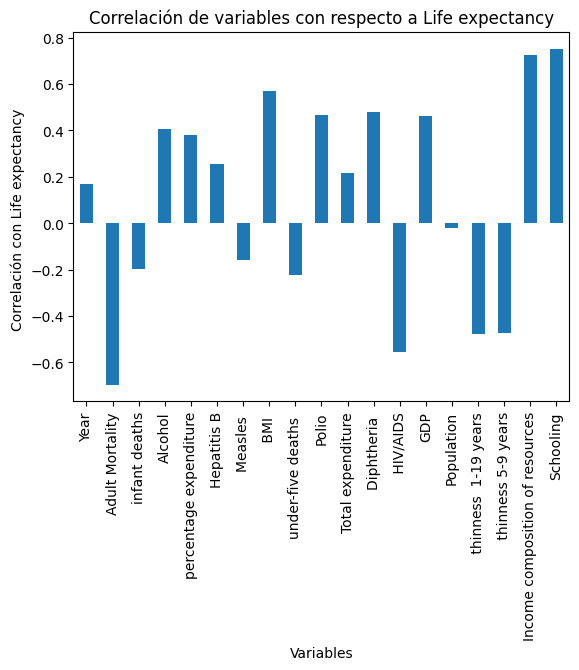

In [ ]:
# Graficar la correlación con respecto a 'Life expectancy '
correlation_with_varobjt.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlación con Life expectancy ')
plt.title('Correlación de variables con respecto a Life expectancy')
plt.show()

## Completitud

In [ ]:
metodo_por_columnas = {
    'Life expectancy ': 'median',
    'Adult Mortality': 'median',
    'Alcohol': 'median',
    'Hepatitis B': 'median',
    ' BMI ': 'median',
    'Polio': 'median',
    'Total expenditure': 'median',
    'Diphtheria ':'median',
    'GDP': 'median',
    'Population': 'median',
    ' thinness  1-19 years': 'median',
    ' thinness 5-9 years': 'median',
    'Income composition of resources': 'median',
    'Schooling': 'median'}

In [ ]:
df = llenar_o_eliminar_valores(df, 0.75, metodo_por_columnas)

In [ ]:
#Verificar valores nulos

df.count() / len(df)

Country                            1.0
Year                               1.0
Status                             1.0
Life expectancy                    1.0
Adult Mortality                    1.0
infant deaths                      1.0
Alcohol                            1.0
percentage expenditure             1.0
Hepatitis B                        1.0
Measles                            1.0
 BMI                               1.0
under-five deaths                  1.0
Polio                              1.0
Total expenditure                  1.0
Diphtheria                         1.0
 HIV/AIDS                          1.0
GDP                                1.0
Population                         1.0
 thinness  1-19 years              1.0
 thinness 5-9 years                1.0
Income composition of resources    1.0
Schooling                          1.0
dtype: float64

#Transformación de variables categóricas

In [ ]:
df = Dummies(df, ['Country', 'Status'])

In [ ]:
X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

En este momento vamos a partir los datos en **conjunto de entrenamiento** y en **conjunto de testing**.

Los **conjuntos de entrenamiento** sirven para que Python «entrene» los datos, mientras que el **conjunto de testing** es para evaluar que tan preciso es nuestro modelo.

Recordemos que para hacer eso usaremos la función `train_test_split`, la cual devolverá siempre cuatro valores `X_train`, `X_test`, `y_train` y `y_test` siempre en ese orden.

Los parámetros que señalaremos son:
- `X` para las variables independientes.
- `y.values.reshape(-1, 1)` este se escribe de esta forma ya que convierte los valores en un vector.
- `train_size= 0.7`, indica que el 70% de los valores será para entrenamiento y el resto será para «testeo», por lo general se usa entre el 70% y el 80% en este parámetro.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                    )

Ahora seleccionaremos el modelo a usar (`LinearRegression`) y le asignamos un objeto, en nuestro ejemplo al objeto lo hemos llamado `modelo`.


In [ ]:
modelo = LinearRegression()

Ahora entrenaremos el modelo colocando a nuestro `objeto` la palabra `.fit` e indicando los valores de `X` y de `y`.

In [ ]:
modelo.fit(X = X_train, y = y_train)

LinearRegression()

A continuación, vamos a hacer un diagrama especial, el cual indicarmeos cada uno de los coeficientes, así que antes de iniciar haremos un _dataframe_ con la función `pd.DataFrame` de **Pandas**.

A este nuevo _dataframe_, en nuestro ejemplo, hemos llamado `df_coeficientes` y estará constituido de dos columnas: `predictor` y `coef`.

Para la columna `predictor` indicaremos el nombre de cada variable, para ello usamos `X_train.columns`.

Para la columna `coef` indicarmeos el coeficiente (o peso, $b_i$) para cada variable ($x_i$) de la fórmula:
$$
\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$
para eso usamos `.coef_` y agregamos `.flatten` ya que los resultados son en 2-D y este comando lo devuelve como un valor plano.

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

Continuaremos con una gráfica, en la cual se señala cada uno de los coeficientes para cada variable.

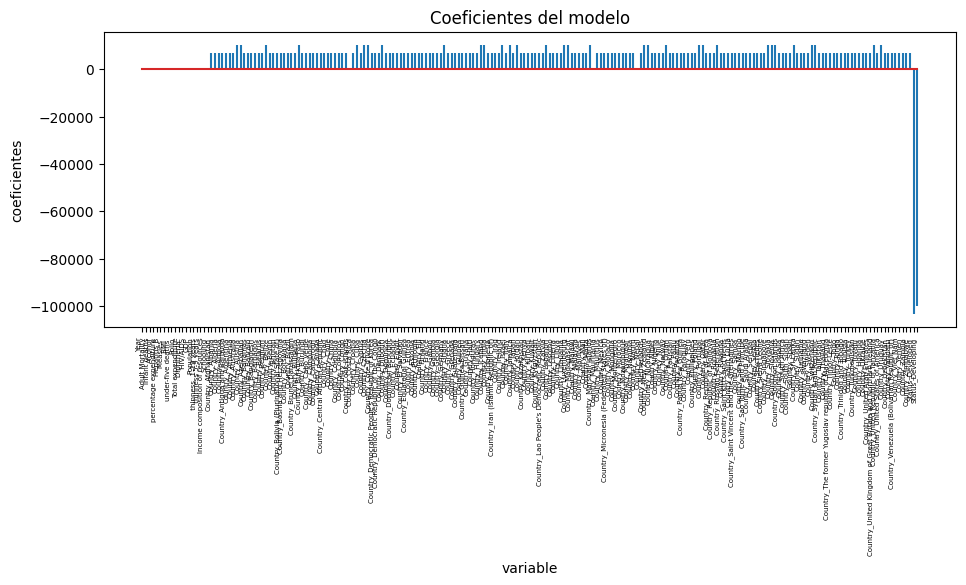

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Vamos a entender un poco la fórmula de regresión líneal, para ello veamos los coeficientes de las primeras cinco variables.

In [ ]:
modelo.coef_[0][0:5]

array([ 2.70801897e-01, -2.10798791e-03,  7.99645039e-02, -4.75230719e-02,
        1.02550553e-04])

y también veremos el valor intercepto o la origen:

In [ ]:
modelo.intercept_

array([92670.8395143])

El siguiente paso es ahora correr el modelo pero para el **conjunto de testing**, para ello usamos al objeto `modelo` la función `.predict(X_test)`, es buena idea que el resultado esté dentro de una variable a la que llamaremos `predicciones`, y así poderla usar más tarde.

In [ ]:
predicciones = modelo.predict(X_test)

Ahora podemos ver, por ejemplo, los primeros cinco valores predichos con nuestro modelo entrenado.

In [ ]:
predicciones = predicciones.flatten()
predicciones[:5]

array([74.07425197, 74.31505292, 74.56696859, 74.18562266, 75.63263945])

Este es un comparativo que haremos de los cinco primeros valores reales contra los cinco primeros valores predichos.

In [ ]:
comp = pd.DataFrame({'Real': y_test.flatten(),
                     'Predicción': predicciones})
comp.head(10)

,Real,Predicción
0,72.1,74.074252
1,74.5,74.315053
2,73.5,74.566969
3,74.2,74.185623
4,74.5,75.632639
5,78.2,77.386609
6,58.0,60.501334
7,83.0,82.090066
8,79.4,80.988207
9,77.0,77.856264


In [ ]:
# R^2
modelo.score(X,y)

-531.1251402714859

In [ ]:
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error cuadrático medio de test es: {rmse_ols}")


El error cuadrático medio de test es: 400.27096330162425


In [ ]:
#Graficando los resultados

# Reducción de dimensionalidad usando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # Reducimos a 1 componente para visualizar en 2D
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
y_pred = regression_model.predict(X_test_pca)

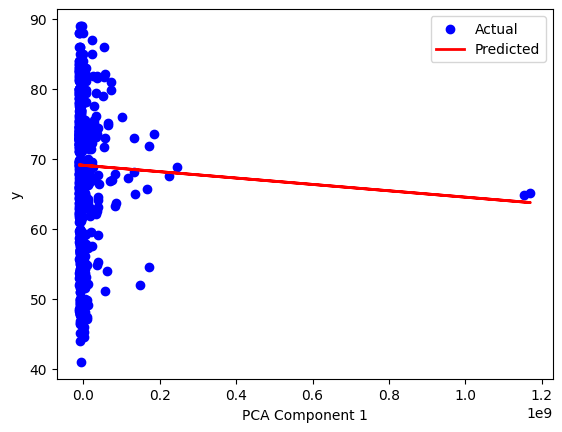

In [ ]:
plt.scatter(X_test_pca, y_test, color='blue', label='Actual')
plt.plot(X_test_pca, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('PCA Component 1')
plt.ylabel('y')
plt.legend()
plt.show()
